# Least Squares and Curve Fitting
- **Purpose**: Fit models to noisy data by minimizing squared errors
- **scipy.optimize**: curve_fit, least_squares, leastsq
- **Applications**: Regression, parameter estimation, calibration

Key concepts:
- **Least squares**: Minimize Σ(yᵢ - f(xᵢ))²
- **Linear**: y = ax + b (simple regression)
- **Nonlinear**: y = f(x; θ) where f is nonlinear in parameters θ
- **Weighted**: Give more importance to certain data points
- **Robust**: Reduce influence of outliers

Real applications:
- **Data analysis**: Trend fitting, prediction models
- **Physics**: Experimental data fitting, law discovery
- **Finance**: Risk models, yield curves
- **Biology**: Growth curves, dose-response
- **Engineering**: Calibration, system identification

In [1]:
import numpy as np
from scipy import optimize
from scipy import stats
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Curve fitting module loaded")

Curve fitting module loaded


## Linear Least Squares

**Problem**: Fit y = ax + b to data (x, y)

**Objective**: Minimize Σ(yᵢ - (axᵢ + b))²

**Solution**: Closed-form (normal equations)

**scipy.stats.linregress**: Convenient for simple linear regression

**Returns**: slope, intercept, r-value, p-value, std_err

Linear Regression: y = ax + b

True parameters:
  Slope (a): 2.5
  Intercept (b): 1.0

Fitted parameters:
  Slope: 2.3840 ± 0.0890
  Intercept: 1.1289 ± 0.5167
  R² (correlation): 0.9372
  P-value: 1.64e-30

Fit quality:
  RMSE: 1.8167
  R²: 0.9372 (closer to 1 = better)


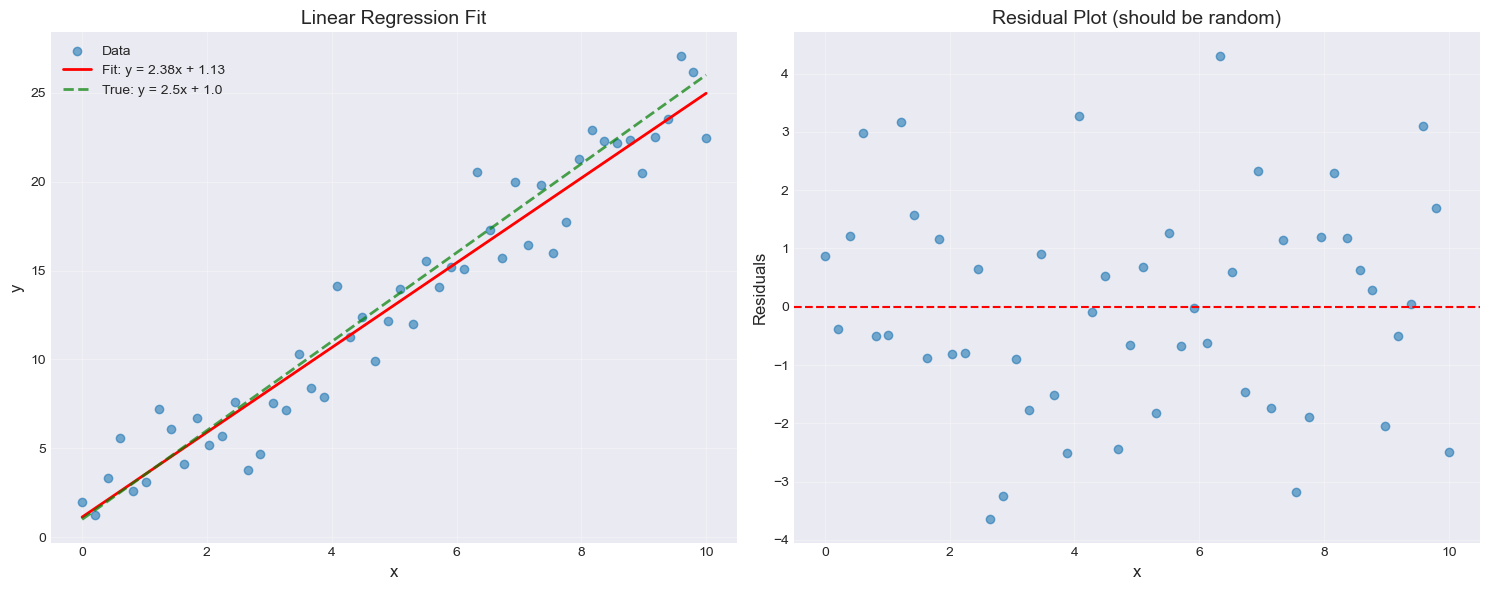


Good fit: residuals randomly scattered around zero!


In [2]:
# Generate noisy linear data
np.random.seed(42)
x_data = np.linspace(0, 10, 50)
true_slope = 2.5
true_intercept = 1.0
noise = np.random.randn(50) * 2
y_data = true_slope * x_data + true_intercept + noise

print("Linear Regression: y = ax + b")
print(f"\nTrue parameters:")
print(f"  Slope (a): {true_slope}")
print(f"  Intercept (b): {true_intercept}\n")

# Fit using scipy.stats.linregress
result = stats.linregress(x_data, y_data)

print("Fitted parameters:")
print(f"  Slope: {result.slope:.4f} ± {result.stderr:.4f}")
print(f"  Intercept: {result.intercept:.4f} ± {result.intercept_stderr:.4f}")
print(f"  R² (correlation): {result.rvalue**2:.4f}")
print(f"  P-value: {result.pvalue:.2e}")

# Predict
y_fit = result.slope * x_data + result.intercept

# Residuals
residuals = y_data - y_fit
rmse = np.sqrt(np.mean(residuals**2))

print(f"\nFit quality:")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²: {result.rvalue**2:.4f} (closer to 1 = better)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Fit
axes[0].scatter(x_data, y_data, alpha=0.6, label='Data')
axes[0].plot(x_data, y_fit, 'r-', linewidth=2, 
            label=f'Fit: y = {result.slope:.2f}x + {result.intercept:.2f}')
axes[0].plot(x_data, true_slope*x_data + true_intercept, 'g--', 
            linewidth=2, alpha=0.7, label='True: y = 2.5x + 1.0')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Linear Regression Fit', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Residuals
axes[1].scatter(x_data, residuals, alpha=0.6)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot (should be random)', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nGood fit: residuals randomly scattered around zero!")

## Nonlinear Curve Fitting with curve_fit

**General form**: y = f(x; θ₁, θ₂, ...)

**Method**: Levenberg-Marquardt algorithm (combines Newton + gradient descent)

**Function**: `optimize.curve_fit(f, xdata, ydata, p0=initial_guess)`

**Returns**:
- `popt`: Optimal parameters
- `pcov`: Covariance matrix (uncertainty)

**Example**: Exponential growth y = A·exp(B·x) + C

Nonlinear Curve Fitting: y = A·exp(B·x) + C

True parameters:
  A = 2.0
  B = 0.5
  C = 1.0

Fitted parameters:
  A = 1.6307 ± 0.3182
  B = 0.5397 ± 0.0439
  C = 1.4907 ± 0.4635

R² = 0.9842
RMSE = 0.4549


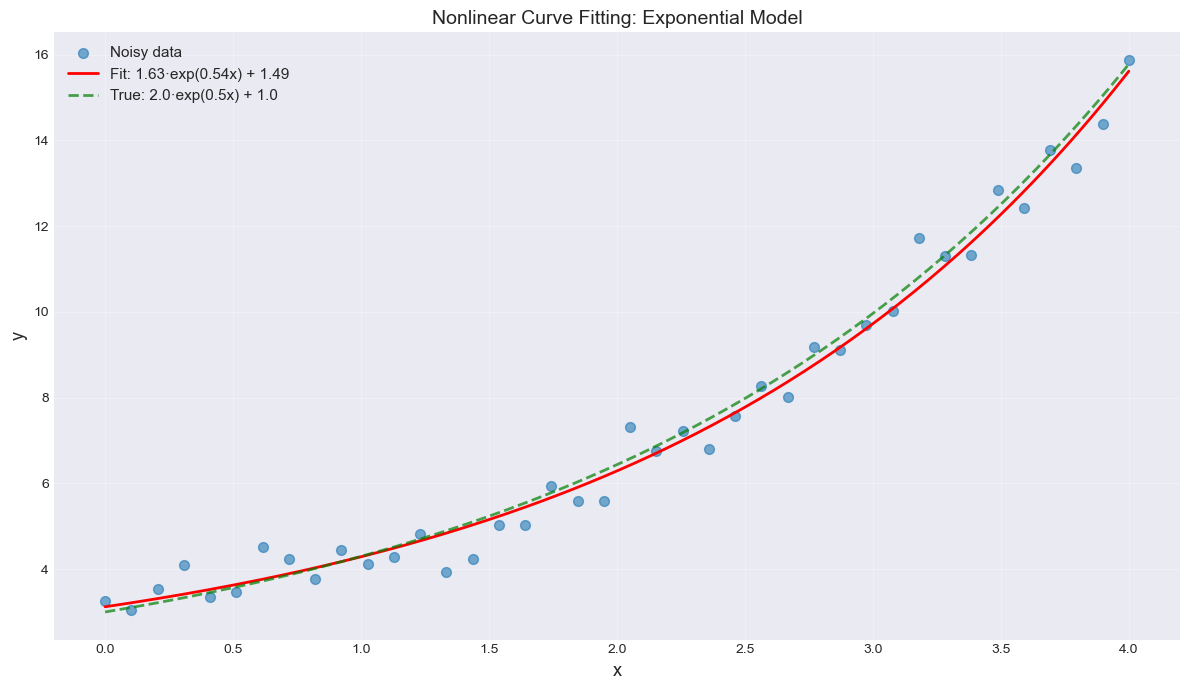


curve_fit successfully estimates parameters from noisy data!


In [3]:
# Exponential model
def exponential(x, A, B, C):
    return A * np.exp(B * x) + C

# Generate data
np.random.seed(42)
x_data = np.linspace(0, 4, 40)
true_params = [2.0, 0.5, 1.0]  # A, B, C
y_true = exponential(x_data, *true_params)
y_data = y_true + np.random.randn(40) * 0.5

print("Nonlinear Curve Fitting: y = A·exp(B·x) + C")
print(f"\nTrue parameters:")
print(f"  A = {true_params[0]}")
print(f"  B = {true_params[1]}")
print(f"  C = {true_params[2]}\n")

# Fit using curve_fit
initial_guess = [1.0, 0.1, 0.0]
popt, pcov = optimize.curve_fit(exponential, x_data, y_data, p0=initial_guess)

# Extract parameters and uncertainties
A_fit, B_fit, C_fit = popt
perr = np.sqrt(np.diag(pcov))  # Standard deviation of parameters

print("Fitted parameters:")
print(f"  A = {A_fit:.4f} ± {perr[0]:.4f}")
print(f"  B = {B_fit:.4f} ± {perr[1]:.4f}")
print(f"  C = {C_fit:.4f} ± {perr[2]:.4f}")

# Predictions
x_fine = np.linspace(0, 4, 200)
y_fit = exponential(x_fine, *popt)
y_true_plot = exponential(x_fine, *true_params)

# R²
y_pred_data = exponential(x_data, *popt)
ss_res = np.sum((y_data - y_pred_data)**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"\nR² = {r_squared:.4f}")
print(f"RMSE = {np.sqrt(np.mean((y_data - y_pred_data)**2)):.4f}")

# Visualize
plt.figure(figsize=(12, 7))
plt.scatter(x_data, y_data, alpha=0.6, s=50, label='Noisy data')
plt.plot(x_fine, y_fit, 'r-', linewidth=2, 
         label=f'Fit: {A_fit:.2f}·exp({B_fit:.2f}x) + {C_fit:.2f}')
plt.plot(x_fine, y_true_plot, 'g--', linewidth=2, alpha=0.7,
         label='True: 2.0·exp(0.5x) + 1.0')
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Nonlinear Curve Fitting: Exponential Model', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\ncurve_fit successfully estimates parameters from noisy data!")

## Real Example: Stock Volatility Modeling (GARCH)

**Problem**: Fit volatility model to stock returns

**Model**: Simplified GARCH(1,1) for variance
\[ \sigma_t^2 = \omega + \alpha r_{t-1}^2 + \beta \sigma_{t-1}^2 \]

**For simplicity**: Fit exponential moving average of squared returns
\[ \text{Volatility} = \sqrt{A \cdot \text{EWMA}(r^2)} \]

**Application**: Risk management, options pricing, portfolio optimization

Stock Volatility Estimation
  Data: 252 days of returns
  Rolling window: 20 days

Fitted EWMA volatility model:
  Scaling (A): 1.0216
  Decay (λ): 0.9213
  Offset (B): -0.0081

R² = 0.9738


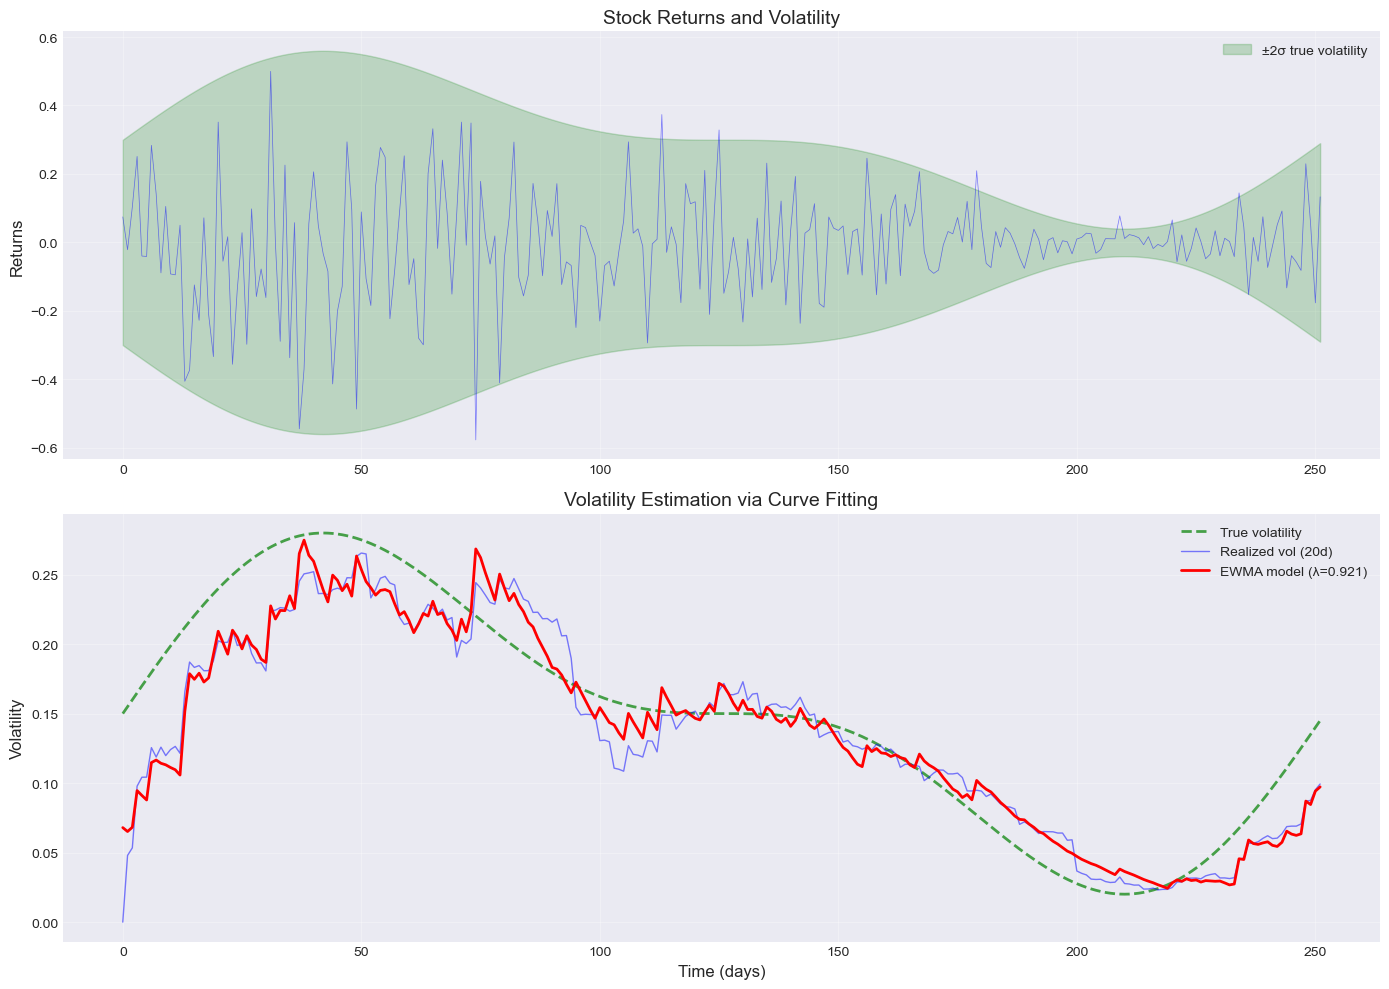


EWMA model captures volatility dynamics for risk management!


In [4]:
# Simulate stock returns with time-varying volatility
np.random.seed(42)
n_days = 252  # Trading days
time = np.arange(n_days)

# True volatility varies with time
true_vol = 0.15 + 0.10 * np.sin(2*np.pi*time/252) + 0.05*np.sin(4*np.pi*time/252)
returns = true_vol * np.random.randn(n_days)

# Realized volatility (rolling std)
window = 20
realized_vol = np.array([returns[max(0,i-window):i+1].std() 
                        for i in range(n_days)])

print("Stock Volatility Estimation")
print(f"  Data: {n_days} days of returns")
print(f"  Rolling window: {window} days\n")

# Fit EWMA model: vol = A * EWMA(returns²)^0.5 + B
def volatility_model(t, A, decay, B):
    """EWMA-based volatility model"""
    ewma = np.zeros(len(t))
    ewma[0] = returns[0]**2
    for i in range(1, len(t)):
        ewma[i] = decay * ewma[i-1] + (1-decay) * returns[int(t[i])]**2
    return A * np.sqrt(ewma) + B

# Fit model
time_array = np.arange(len(realized_vol))
popt, pcov = optimize.curve_fit(
    volatility_model, 
    time_array, 
    realized_vol,
    p0=[1.0, 0.94, 0.0],
    bounds=([0.1, 0.8, -0.1], [3.0, 0.99, 0.1])
)

A_opt, decay_opt, B_opt = popt
print("Fitted EWMA volatility model:")
print(f"  Scaling (A): {A_opt:.4f}")
print(f"  Decay (λ): {decay_opt:.4f}")
print(f"  Offset (B): {B_opt:.4f}")

# Predictions
vol_fitted = volatility_model(time_array, *popt)

# Metrics
r2 = 1 - np.sum((realized_vol - vol_fitted)**2) / np.sum((realized_vol - realized_vol.mean())**2)
print(f"\nR² = {r2:.4f}")

# Visualize
plt.figure(figsize=(14, 10))

# Returns
plt.subplot(2, 1, 1)
plt.plot(time, returns, 'b-', alpha=0.5, linewidth=0.5)
plt.fill_between(time, -2*true_vol, 2*true_vol, alpha=0.2, color='green',
                label='±2σ true volatility')
plt.ylabel('Returns', fontsize=12)
plt.title('Stock Returns and Volatility', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Volatility
plt.subplot(2, 1, 2)
plt.plot(time, true_vol, 'g--', linewidth=2, alpha=0.7, label='True volatility')
plt.plot(time, realized_vol, 'b-', alpha=0.5, linewidth=1, label='Realized vol (20d)')
plt.plot(time, vol_fitted, 'r-', linewidth=2, label=f'EWMA model (λ={decay_opt:.3f})')
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.title('Volatility Estimation via Curve Fitting', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nEWMA model captures volatility dynamics for risk management!")

## Polynomial Fitting

**Model**: y = a₀ + a₁x + a₂x² + ... + aₙxⁿ

**NumPy function**: `np.polyfit(x, y, deg)`

**Warning**: ⚠️ High-degree polynomials can overfit!

**Use cases**:
- Trend lines (degree 1-2)
- Calibration curves (degree 2-3)
- Local approximation

**Alternative**: Use splines for smooth curves (next notebooks)

Polynomial Fitting: Comparing Different Degrees

Degree 1: R² = 0.5321
Degree 2: R² = 0.8954
Degree 3: R² = 0.9667
Degree 9: R² = 0.9732


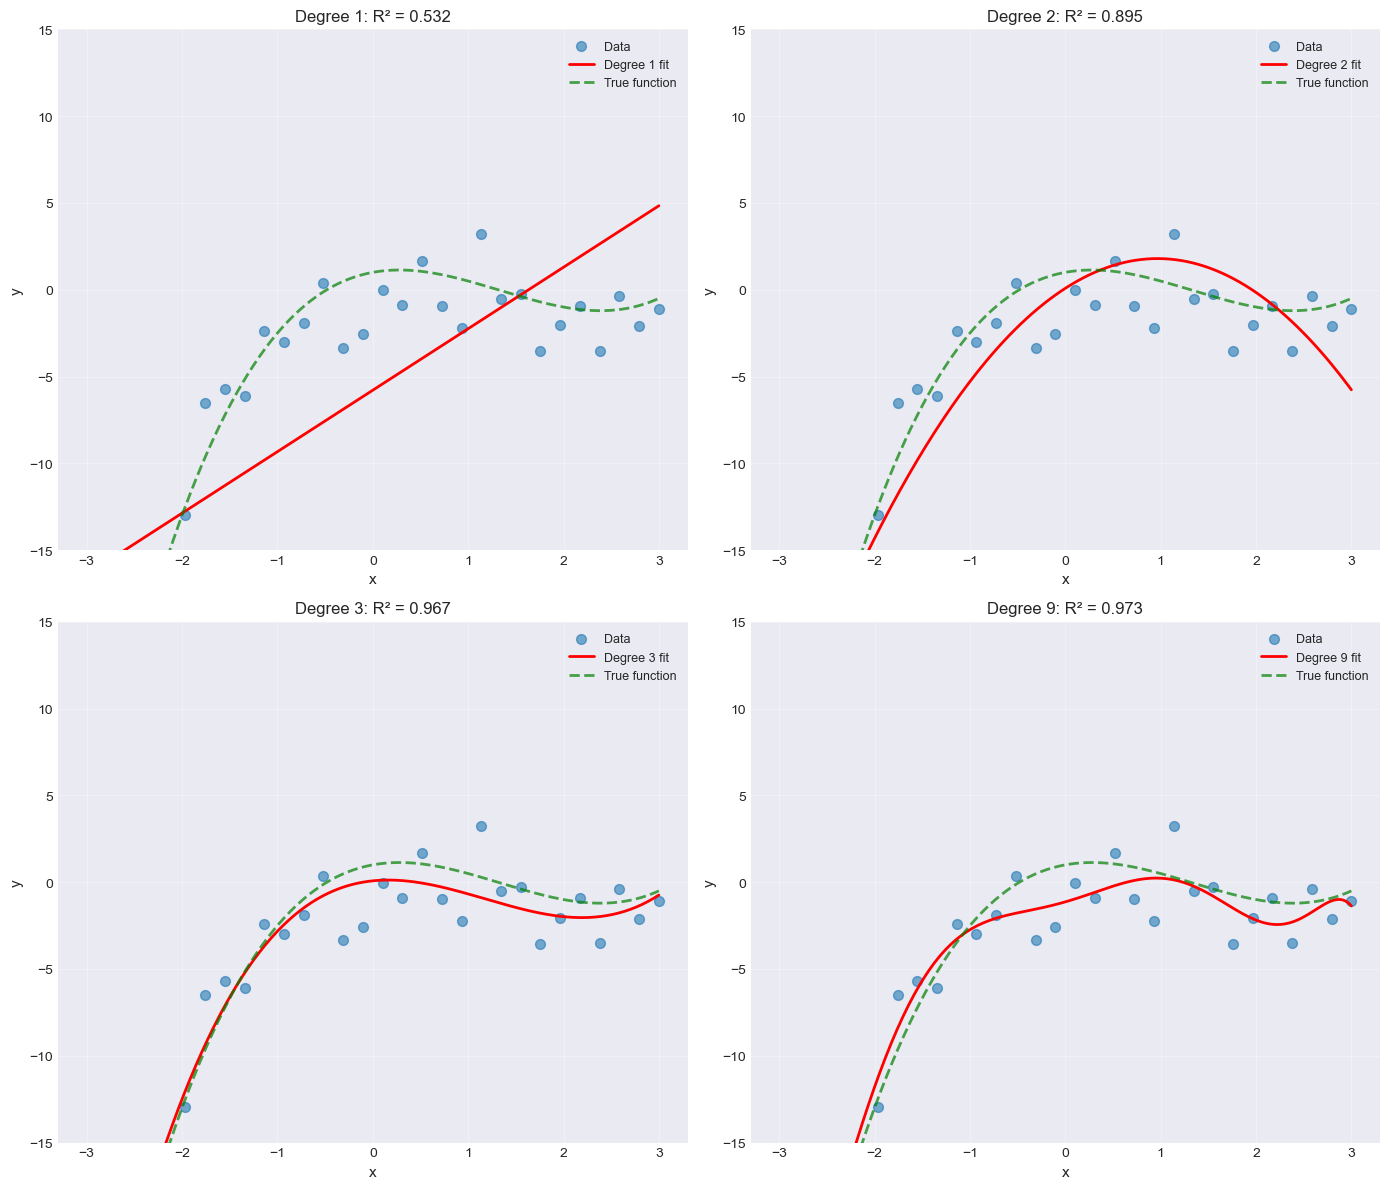


Key observations:
  - Degree 1 (linear): Underfits, misses curvature
  - Degree 2 (quadratic): Still underfits slightly
  - Degree 3 (cubic): Good fit! Matches true model
  - Degree 9: Overfits! Wiggles unrealistically

⚠️  Higher R² doesn't always mean better model!


In [5]:
# Generate data with cubic trend + noise
np.random.seed(42)
x_data = np.linspace(-3, 3, 30)
y_true = 0.5*x_data**3 - 2*x_data**2 + x_data + 1
y_data = y_true + np.random.randn(30) * 2

print("Polynomial Fitting: Comparing Different Degrees\n")

# Fit polynomials of different degrees
degrees = [1, 2, 3, 9]
x_fine = np.linspace(-3, 3, 200)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, deg in enumerate(degrees):
    # Fit
    coeffs = np.polyfit(x_data, y_data, deg)
    poly = np.poly1d(coeffs)
    y_fit = poly(x_fine)
    
    # R²
    y_pred = poly(x_data)
    r2 = 1 - np.sum((y_data - y_pred)**2) / np.sum((y_data - y_data.mean())**2)
    
    # Plot
    axes[i].scatter(x_data, y_data, alpha=0.6, s=50, label='Data')
    axes[i].plot(x_fine, y_fit, 'r-', linewidth=2, 
                label=f'Degree {deg} fit')
    axes[i].plot(x_fine, 0.5*x_fine**3 - 2*x_fine**2 + x_fine + 1,
                'g--', linewidth=2, alpha=0.7, label='True function')
    axes[i].set_xlabel('x', fontsize=11)
    axes[i].set_ylabel('y', fontsize=11)
    axes[i].set_title(f'Degree {deg}: R² = {r2:.3f}', fontsize=12)
    axes[i].legend(fontsize=9)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(-15, 15)
    
    # Print results
    print(f"Degree {deg}: R² = {r2:.4f}")

plt.tight_layout()
plt.show()

print("\nKey observations:")
print("  - Degree 1 (linear): Underfits, misses curvature")
print("  - Degree 2 (quadratic): Still underfits slightly")
print("  - Degree 3 (cubic): Good fit! Matches true model")
print("  - Degree 9: Overfits! Wiggles unrealistically")
print("\n⚠️  Higher R² doesn't always mean better model!")

## Robust Fitting with least_squares

**Problem**: Outliers distort least squares fit

**Solution**: Robust loss functions reduce outlier influence

**Loss functions**:
- `'linear'`: Standard least squares Σr²
- `'soft_l1'`: Smooth approximation to L1
- `'huber'`: Quadratic for small errors, linear for large
- `'cauchy'`: Very robust to outliers

**Function**: `optimize.least_squares(residuals, x0, loss='huber')`

Robust Fitting with Outliers
  Data points: 40
  Outliers: 4

Standard least squares:
  y = 2.163x + 2.506

Robust least squares (Huber):
  y = 2.336x + 1.459

True model: y = 2.5x + 1.0

Error from true:
  Standard: slope error = 0.337
  Robust: slope error = 0.164


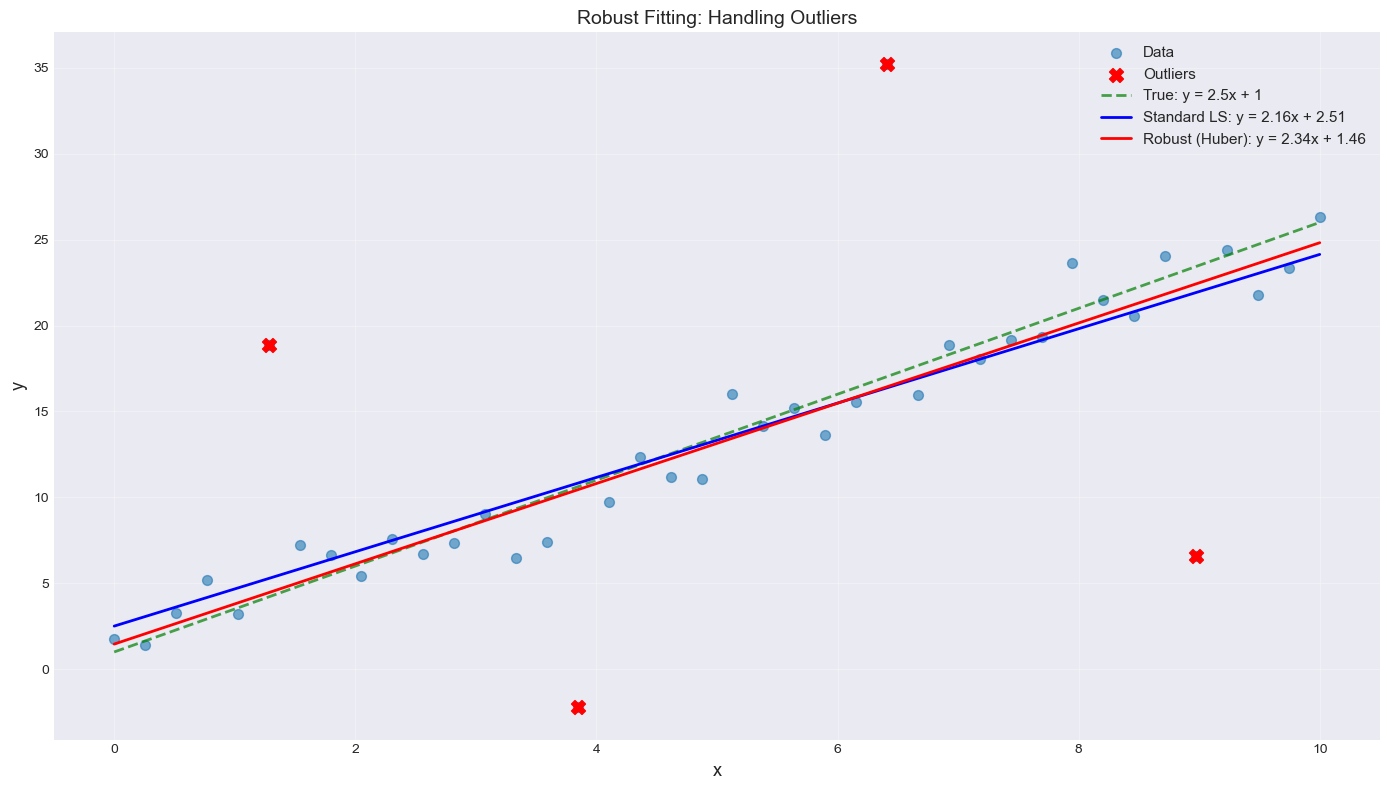


Robust fitting reduces outlier influence!


In [6]:
# Generate data with outliers
np.random.seed(42)
x_data = np.linspace(0, 10, 40)
y_clean = 2.5 * x_data + 1.0
noise = np.random.randn(40) * 1.5
y_data = y_clean + noise

# Add outliers
outlier_indices = [5, 15, 25, 35]
y_data[outlier_indices] += np.array([15, -12, 18, -15])

print("Robust Fitting with Outliers")
print(f"  Data points: {len(x_data)}")
print(f"  Outliers: {len(outlier_indices)}\n")

# Define linear model residuals
def residuals_linear(params, x, y):
    a, b = params
    return y - (a * x + b)

# Standard least squares
result_std = optimize.least_squares(
    residuals_linear, [1, 1], args=(x_data, y_data), loss='linear'
)
a_std, b_std = result_std.x

# Robust least squares (Huber)
result_robust = optimize.least_squares(
    residuals_linear, [1, 1], args=(x_data, y_data), loss='huber'
)
a_robust, b_robust = result_robust.x

print("Standard least squares:")
print(f"  y = {a_std:.3f}x + {b_std:.3f}")

print("\nRobust least squares (Huber):")
print(f"  y = {a_robust:.3f}x + {b_robust:.3f}")

print("\nTrue model: y = 2.5x + 1.0")
print(f"\nError from true:")
print(f"  Standard: slope error = {abs(a_std - 2.5):.3f}")
print(f"  Robust: slope error = {abs(a_robust - 2.5):.3f}")

# Visualize
x_plot = np.linspace(0, 10, 100)
y_std = a_std * x_plot + b_std
y_robust = a_robust * x_plot + b_robust
y_true = 2.5 * x_plot + 1.0

plt.figure(figsize=(14, 8))
plt.scatter(x_data, y_data, alpha=0.6, s=50, label='Data')
plt.scatter(x_data[outlier_indices], y_data[outlier_indices], 
           color='red', s=100, marker='X', label='Outliers', zorder=5)
plt.plot(x_plot, y_true, 'g--', linewidth=2, alpha=0.7, label='True: y = 2.5x + 1')
plt.plot(x_plot, y_std, 'b-', linewidth=2, 
        label=f'Standard LS: y = {a_std:.2f}x + {b_std:.2f}')
plt.plot(x_plot, y_robust, 'r-', linewidth=2,
        label=f'Robust (Huber): y = {a_robust:.2f}x + {b_robust:.2f}')
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Robust Fitting: Handling Outliers', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nRobust fitting reduces outlier influence!")

## Summary

### Main Functions:

```python
# Linear regression
result = stats.linregress(x, y)

# Nonlinear curve fitting
popt, pcov = optimize.curve_fit(model, x, y, p0=initial_guess)

# Polynomial fitting
coeffs = np.polyfit(x, y, degree)

# Robust fitting
result = optimize.least_squares(residuals, x0, loss='huber')
```

### Method Selection:

| Data Type | Method | Function |
|-----------|--------|----------|
| **Linear** | Linear regression | `stats.linregress` |
| **Nonlinear** | Levenberg-Marquardt | `curve_fit` |
| **Polynomial** | Least squares | `np.polyfit` |
| **Outliers** | Robust loss | `least_squares(loss='huber')` |

### Best Practices:

✓ **Plot data first** to choose appropriate model  
✓ **Good initial guess** critical for nonlinear  
✓ **Check residuals** for patterns (should be random)  
✓ **Use uncertainty** (pcov) for error bars  
✓ **Avoid overfitting** (high-degree polynomials)  
✓ **Robust methods** when outliers present  

### Model Validation:

```python
# R² (coefficient of determination)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - y.mean())**2)
r_squared = 1 - ss_res/ss_tot

# RMSE (root mean squared error)
rmse = np.sqrt(np.mean((y - y_pred)**2))

# Always plot residuals!
residuals = y - y_pred
plt.scatter(x, residuals)
```

### Applications:

- **Science**: Fit physical laws to experimental data
- **Finance**: Risk models, yield curves, volatility
- **Engineering**: Calibration, system identification
- **ML**: Feature engineering, model calibration
- **Biology**: Growth curves, dose-response

### Common Pitfalls:

⚠️ **Bad initial guess**: Nonlinear fit converges to local minimum  
⚠️ **Overfitting**: High R² but poor generalization  
⚠️ **Extrapolation**: Model unreliable outside data range  
⚠️ **Outliers**: Can severely distort standard least squares  
⚠️ **Correlated errors**: Violates assumptions